In [1]:
from __future__ import print_function

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import mshr
import numpy as np
import scipy.integrate as integrate
from fenics import *

# TODO 
* Peut être passer sur .py complètement parce qu'ici il y a des erreurs qui ne nous sont pas transmises par le jupyter notebook peut être?
* ajouter debug

Use command *top* to plot cpu-usage in the terminal, *top -i* is even better as it hides idle processes. [Link](https://phoenixnap.com/kb/check-cpu-usage-load-linux).

In [2]:
# local imports
from modules.mesh_utils import get_mesh
from modules.physics_utils import get_VandE, compute_trajectory
#from modules.plotting_utils import ?

In [3]:
# defining dicts, we need L_mot-L_1 < 2*l_mot !
mesh_dict = {
    'L_mot' : .01,
    'l_mot' : .003,
    'L_1' : .0045,
    'l_1': .005,
    'L_2' : .007,
    'l_2' : .015,
    'delta_vert_12' : .005,
    'L_vacuum' : .1,
    'l_vacuum': .05,
    'mesh_resolution' : 100,
    'refine_mesh' : True,
}

phi_dict = {
    'Phi_top_mot' : 0,
    'Phi_bord_mot': 'N',
    'Phi_electrode1' :100,
    'Phi_inter_electrode':'N',
    'Phi_electrode2':300,
    'Phi_sup_vacuum':'N',
    'Phi_inf_vacuum':'N',
}

physics_consts_dict = {
    'rhoelec': 0,
    'PERMITTIVITY' : 8.54e-12,
}

In [4]:
# using local import to create the mesh
mesh, segments_list, zone = get_mesh(mesh_dict)

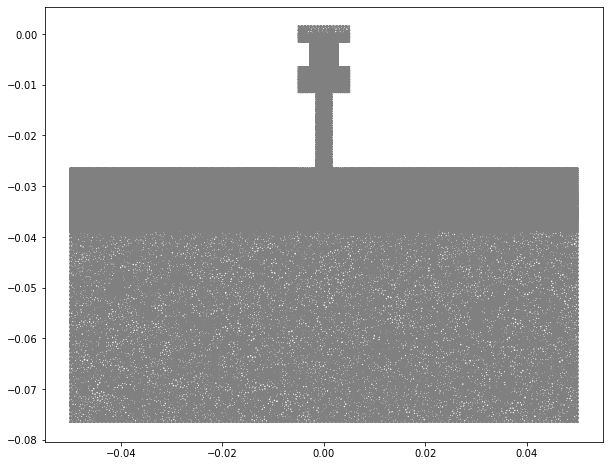

In [5]:
plt.figure(figsize=(10,10))
plot(mesh)
plt.show()

# E and V computations

In [6]:
# E computation
# We use functions defined in the *physics_utils.py* module.
Phi, E = get_VandE(mesh, mesh_dict, phi_dict, physics_consts_dict)
Ex, Ey = E.split(deepcopy=True)
NE=sqrt(dot(E,E))

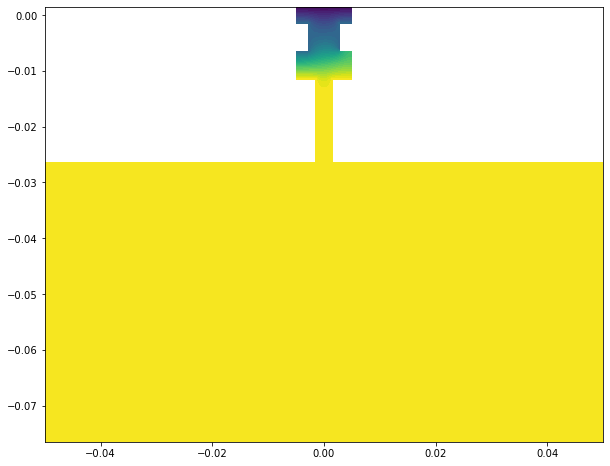

In [7]:
plt.figure(figsize=(10,10))
plot(Phi)
plt.show()

In [8]:
integration_parameters_dict = {
    'tmax' : .00001,
    'dt' : .0000001,
}


injection_dict = {
    'Nombre de particules':10,
    'proportion de I':0,
    'proportion de I+':0,
    'proportion de I-':1,
    'débit de particule en entrée de la grille':1e9,
}

mode_dict={
    'Elastique?':True,
    'Transfert de charge?':True,
    'Contact inter particules?':False,
    'perte u par contact':0.05,
    'proba perte q par contact':0.4,
}

In [9]:
from time import time

nb_simulations = 10
time_smallN = np.zeros(nb_simulations)
time_bigN = np.zeros(nb_simulations)

In [10]:
# compute execution time
for k in range(nb_simulations):
    t = time()
    print("SIMULATION #{} \n".format(k))
    liste_pf, liste_alpha, liste_V, listes_x, listes_y, listes_vx, listes_vy, listes_q, liste_t = \
    compute_trajectory(integration_parameters_dict, injection_dict, mesh_dict, mode_dict, segments_list,
    zone, E, conditional_time_out = 300, time_out_tol = 0.8, absolute_time_out = 600, save_trajectory = True, verbose = True)
    time_smallN[k] = time()-t

  0%|          | 0/101 [00:00<?, ?it/s]

SIMULATION #0 

INITIALIZING SIMULATION
	 max simulation time : 1e-05 seconds 
	 time step : 1e-07 seconds 
	 Number of particules : 10
	 particules proportions : 
		 I  : 0% 
		 I+ : 0% 
		 I- : 100%
PARTICULES INJECTION ... 	[OK]


  0%|          | 0/101 [00:00<?, ?it/s]

END : processing 
STOPPING CRITERION :  TMAX REACHED ~> t = 1.0100000000000012e-05 > 1e-05 = tmax seconds
START : data processing ... 	[OK]
RESULTS :
	 Particules that exited : 9 out of 10.
	 Proportions : 
		 I  : 33% 
		 I+ : 0% 
		 I- : 67%
=> Intermediary positions returned


SIMULATION #1 

INITIALIZING SIMULATION
	 max simulation time : 1e-05 seconds 
	 time step : 1e-07 seconds 
	 Number of particules : 10
	 particules proportions : 
		 I  : 0% 
		 I+ : 0% 
		 I- : 100%
PARTICULES INJECTION ... 	[OK]


  0%|          | 0/101 [00:00<?, ?it/s]

END : processing 
STOPPING CRITERION :  ALL PARTICULES EXITED ~> Nb_out = N = 10
START : data processing ... 	[OK]
RESULTS :
	 Particules that exited : 10 out of 10.
	 Proportions : 
		 I  : 20% 
		 I+ : 0% 
		 I- : 80%
=> Intermediary positions returned


SIMULATION #2 

INITIALIZING SIMULATION
	 max simulation time : 1e-05 seconds 
	 time step : 1e-07 seconds 
	 Number of particules : 10
	 particules proportions : 
		 I  : 0% 
		 I+ : 0% 
		 I- : 100%
PARTICULES INJECTION ... 	[OK]


  0%|          | 0/101 [00:00<?, ?it/s]

END : processing 
STOPPING CRITERION :  ALL PARTICULES EXITED ~> Nb_out = N = 10
START : data processing ... 	[OK]
RESULTS :
	 Particules that exited : 10 out of 10.
	 Proportions : 
		 I  : 10% 
		 I+ : 0% 
		 I- : 90%
=> Intermediary positions returned


SIMULATION #3 

INITIALIZING SIMULATION
	 max simulation time : 1e-05 seconds 
	 time step : 1e-07 seconds 
	 Number of particules : 10
	 particules proportions : 
		 I  : 0% 
		 I+ : 0% 
		 I- : 100%
PARTICULES INJECTION ... 	[OK]


  0%|          | 0/101 [00:00<?, ?it/s]

END : processing 
STOPPING CRITERION :  ALL PARTICULES EXITED ~> Nb_out = N = 10
START : data processing ... 	[OK]
RESULTS :
	 Particules that exited : 10 out of 10.
	 Proportions : 
		 I  : 40% 
		 I+ : 0% 
		 I- : 60%
=> Intermediary positions returned


SIMULATION #4 

INITIALIZING SIMULATION
	 max simulation time : 1e-05 seconds 
	 time step : 1e-07 seconds 
	 Number of particules : 10
	 particules proportions : 
		 I  : 0% 
		 I+ : 0% 
		 I- : 100%
PARTICULES INJECTION ... 	[OK]


  0%|          | 0/101 [00:00<?, ?it/s]

END : processing 
STOPPING CRITERION :  ALL PARTICULES EXITED ~> Nb_out = N = 10
START : data processing ... 	[OK]
RESULTS :
	 Particules that exited : 10 out of 10.
	 Proportions : 
		 I  : 40% 
		 I+ : 0% 
		 I- : 60%
=> Intermediary positions returned


SIMULATION #5 

INITIALIZING SIMULATION
	 max simulation time : 1e-05 seconds 
	 time step : 1e-07 seconds 
	 Number of particules : 10
	 particules proportions : 
		 I  : 0% 
		 I+ : 0% 
		 I- : 100%
PARTICULES INJECTION ... 	[OK]


  0%|          | 0/101 [00:00<?, ?it/s]

END : processing 
STOPPING CRITERION :  TMAX REACHED ~> t = 1.0100000000000012e-05 > 1e-05 = tmax seconds
START : data processing ... 	[OK]
RESULTS :
	 Particules that exited : 8 out of 10.
	 Proportions : 
		 I  : 12% 
		 I+ : 0% 
		 I- : 88%
=> Intermediary positions returned


SIMULATION #6 

INITIALIZING SIMULATION
	 max simulation time : 1e-05 seconds 
	 time step : 1e-07 seconds 
	 Number of particules : 10
	 particules proportions : 
		 I  : 0% 
		 I+ : 0% 
		 I- : 100%
PARTICULES INJECTION ... 	[OK]


  0%|          | 0/101 [00:00<?, ?it/s]

END : processing 
STOPPING CRITERION :  ALL PARTICULES EXITED ~> Nb_out = N = 10
START : data processing ... 	[OK]
RESULTS :
	 Particules that exited : 10 out of 10.
	 Proportions : 
		 I  : 40% 
		 I+ : 0% 
		 I- : 60%
=> Intermediary positions returned


SIMULATION #7 

INITIALIZING SIMULATION
	 max simulation time : 1e-05 seconds 
	 time step : 1e-07 seconds 
	 Number of particules : 10
	 particules proportions : 
		 I  : 0% 
		 I+ : 0% 
		 I- : 100%
PARTICULES INJECTION ... 	[OK]


  0%|          | 0/101 [00:00<?, ?it/s]

END : processing 
STOPPING CRITERION :  ALL PARTICULES EXITED ~> Nb_out = N = 10
START : data processing ... 	[OK]
RESULTS :
	 Particules that exited : 10 out of 10.
	 Proportions : 
		 I  : 30% 
		 I+ : 0% 
		 I- : 70%
=> Intermediary positions returned


SIMULATION #8 

INITIALIZING SIMULATION
	 max simulation time : 1e-05 seconds 
	 time step : 1e-07 seconds 
	 Number of particules : 10
	 particules proportions : 
		 I  : 0% 
		 I+ : 0% 
		 I- : 100%
PARTICULES INJECTION ... 	[OK]


 14%|█▍        | 14/101 [00:28<02:56,  2.02s/it]

WARNING while loop count = 3


 15%|█▍        | 15/101 [00:30<02:54,  2.02s/it]

WARNING while loop count = 3


 17%|█▋        | 17/101 [00:34<02:50,  2.02s/it]

WARNING while loop count = 3


 18%|█▊        | 18/101 [00:36<02:48,  2.02s/it]

WARNING while loop count = 3


 33%|███▎      | 33/101 [01:03<01:20,  1.19s/it]

WARNING while loop count = 3


 34%|███▎      | 34/101 [01:03<01:07,  1.01s/it]

WARNING while loop count = 3


  0%|          | 0/101 [00:00<?, ?it/s]

END : processing 
STOPPING CRITERION :  ALL PARTICULES EXITED ~> Nb_out = N = 10
START : data processing ... 	[OK]
RESULTS :
	 Particules that exited : 10 out of 10.
	 Proportions : 
		 I  : 50% 
		 I+ : 0% 
		 I- : 50%
=> Intermediary positions returned


SIMULATION #9 

INITIALIZING SIMULATION
	 max simulation time : 1e-05 seconds 
	 time step : 1e-07 seconds 
	 Number of particules : 10
	 particules proportions : 
		 I  : 0% 
		 I+ : 0% 
		 I- : 100%
PARTICULES INJECTION ... 	[OK]


 93%|█████████▎| 94/101 [01:15<00:05,  1.25it/s]

END : processing 
STOPPING CRITERION :  ALL PARTICULES EXITED ~> Nb_out = N = 10
START : data processing ... 	[OK]
RESULTS :
	 Particules that exited : 10 out of 10.
	 Proportions : 
		 I  : 60% 
		 I+ : 0% 
		 I- : 40%
=> Intermediary positions returned




In [ ]:
# compute execution time
for k in range(nb_simulations):
    t = time()
    print("SIMULATION #{} \n".format(k))
    liste_pf, liste_alpha, liste_V = \
    compute_trajectory(integration_parameters_dict, injection_dict, mesh_dict, mode_dict, segments_list,
    zone, E, conditional_time_out = 300, time_out_tol = 0.8, absolute_time_out = 600, save_trajectory = False, verbose = True)
    time_bigN[k] = time()-t

  0%|          | 0/101 [00:00<?, ?it/s]

SIMULATION #0 

INITIALIZING SIMULATION
	 max simulation time : 1e-05 seconds 
	 time step : 1e-07 seconds 
	 Number of particules : 10
	 particules proportions : 
		 I  : 0% 
		 I+ : 0% 
		 I- : 100%
PARTICULES INJECTION ... 	[OK]


  0%|          | 0/101 [00:00<?, ?it/s]

END : processing 
STOPPING CRITERION :  ALL PARTICULES EXITED ~> Nb_out = N = 10
START : data processing ... 	[OK]
RESULTS :
	 Particules that exited : 10 out of 10.
	 Proportions : 
		 I  : 40% 
		 I+ : 0% 
		 I- : 60%


SIMULATION #1 

INITIALIZING SIMULATION
	 max simulation time : 1e-05 seconds 
	 time step : 1e-07 seconds 
	 Number of particules : 10
	 particules proportions : 
		 I  : 0% 
		 I+ : 0% 
		 I- : 100%
PARTICULES INJECTION ... 	[OK]


  0%|          | 0/101 [00:00<?, ?it/s]

END : processing 
STOPPING CRITERION :  ALL PARTICULES EXITED ~> Nb_out = N = 10
START : data processing ... 	[OK]
RESULTS :
	 Particules that exited : 10 out of 10.
	 Proportions : 
		 I  : 20% 
		 I+ : 0% 
		 I- : 80%


SIMULATION #2 

INITIALIZING SIMULATION
	 max simulation time : 1e-05 seconds 
	 time step : 1e-07 seconds 
	 Number of particules : 10
	 particules proportions : 
		 I  : 0% 
		 I+ : 0% 
		 I- : 100%
PARTICULES INJECTION ... 	[OK]


 12%|█▏        | 12/101 [00:22<02:50,  1.91s/it]

In [13]:
print("Mean time for {} simulations and {} particules : \n\t for the smallN algorithm : {} seconds \n\t\t versus \n\t for the bigN algorithm : {} seconds".format(nb_simulations,injection_dict['Nombre de particules'],round(time_smallN.mean(),1),round(time_bigN.mean(),1)))

Mean time for 10 simulations and 10 particules : 
	 for the smallN algorithm : 74.7 seconds 
		 versus 
	 for the bigN algorithm : 69.5 seconds


NameError: name 'listes_x' is not defined

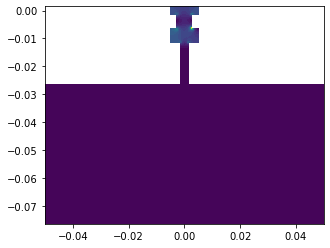

In [11]:
# plt.figure(figsize=(20,20))
fig=plot(NE)
for i in range (injection_dict['Nombre de particules']):
    plt.plot(listes_x[i],listes_y[i],linestyle='-',color='r')
    plt.scatter(listes_x[i][0],listes_y[i][0],color='r')
    plt.scatter(listes_x[i][-1],listes_y[i][-1],color='r')
plt.title('E (V/m)', size=35)
plt.xlabel('x (m)',size=10)
plt.ylabel('y (m)',size=10)
fig.set_cmap("viridis")
plt.colorbar(fig)
plt.show()